In [1]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import os

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import save_model, load_model
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau


### Analyzing

In [2]:
# Importing Dataset
train_dir = '../data/train/'
test_dir = '../data/eval/'

In [3]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
    plt.figure(figsize=(10, 10))  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()        
        plt.axis('off')
        plt.imshow(img, cmap='gray') 

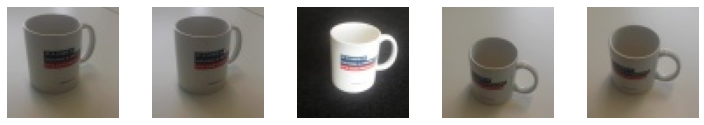

In [4]:
# white
plot_images(train_dir+'/0white')

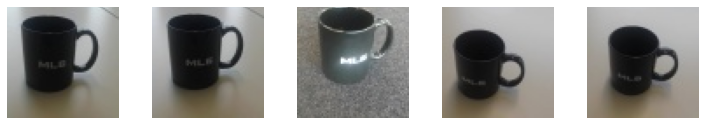

In [5]:
# black
plot_images(train_dir+'/1black')

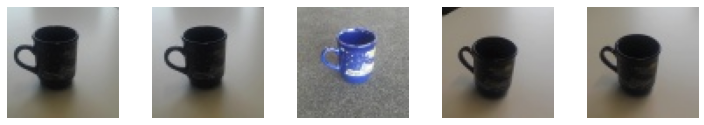

In [6]:
# blue
plot_images(train_dir+'/2blue')

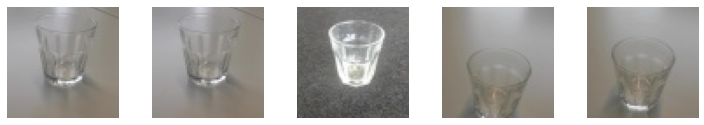

In [7]:
# transparant
plot_images(train_dir+'/3transparant')

In [8]:
def plot_bar_chart_diagram(path_data):
  dic={}
  for data in  os.listdir(path_data):
    dem=0
    for x in os.listdir(path_data+"/"+data):
      dem+=1
    dic[data]=dem
  print(dic)
  barlist=plt.bar(range(len(dic)), list(dic.values()),tick_label=list(dic.keys()))
#set color
  plt.show()

{'0white': 500, '1black': 500, '2blue': 500, '3transparant': 500}


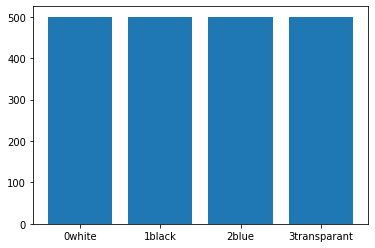

In [9]:
plot_bar_chart_diagram(train_dir)

{'0white': 250, '1black': 250, '2blue': 250, '3transparant': 250}


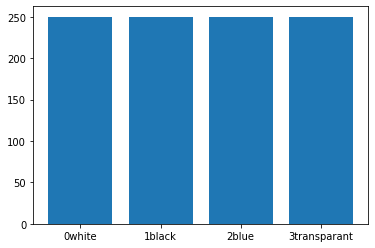

In [10]:
plot_bar_chart_diagram(test_dir)  

### Data Generator

In [11]:

img_size = 48
batch_size = 64

data_train = ImageDataGenerator(horizontal_flip=True)
train_generator = data_train.flow_from_directory(train_dir, target_size=(img_size,img_size), color_mode="grayscale",
                                                    batch_size=batch_size, class_mode='categorical', shuffle=True)

data_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = data_validation.flow_from_directory(test_dir, target_size=(img_size,img_size), color_mode="grayscale",
                                                    batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 2000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


### Create Convolutional Nueral Network (CNN) Model

In [12]:
# Initialising the CNN
model = Sequential()

In [13]:
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))


In [14]:
# choose a Learning rate of 0.0009
opt = Adam(learning_rate=0.0009)

# Compile defines the loss function, the optimizer and the metrics.

# As I have Categorical Values we will use 'categorical_crossentropy' loss function
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# check the details of the Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 256)        0

### Train and Evaluate Model

In [15]:
epochs = 15

steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.001, mode='auto')

checkpoint = ModelCheckpoint("model_v1.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)

callbacks = [checkpoint, reduce_lr]

history = model.fit( x=train_generator, steps_per_epoch=steps_per_epoch,
                     epochs=epochs, validation_data = validation_generator,
                     validation_steps = validation_steps, callbacks=callbacks)

Epoch 1/15
31/31 [==============================] - ETA: 0s - loss: 4.6852 - accuracy: 0.5269
Epoch 1: saving model to model_v1.h5
31/31 [==============================] - 37s 1s/step - loss: 4.6852 - accuracy: 0.5269 - val_loss: 0.6785 - val_accuracy: 0.6927 - lr: 9.0000e-04
Epoch 2/15
31/31 [==============================] - ETA: 0s - loss: 0.1444 - accuracy: 0.9561
Epoch 2: saving model to model_v1.h5
31/31 [==============================] - 18s 584ms/step - loss: 0.1444 - accuracy: 0.9561 - val_loss: 1.1384 - val_accuracy: 0.6281 - lr: 9.0000e-04
Epoch 3/15
31/31 [==============================] - ETA: 0s - loss: 0.0114 - accuracy: 0.9979
Epoch 3: saving model to model_v1.h5
31/31 [==============================] - 16s 522ms/step - loss: 0.0114 - accuracy: 0.9979 - val_loss: 1.3860 - val_accuracy: 0.7010 - lr: 9.0000e-04
Epoch 4/15
31/31 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 4: saving model to model_v1.h5
31/31 [=========================

#### Loss and Accuracy plot

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


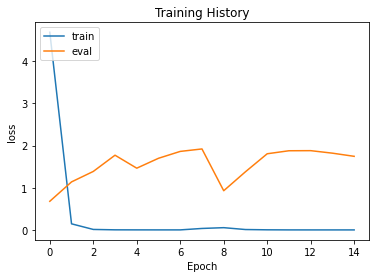

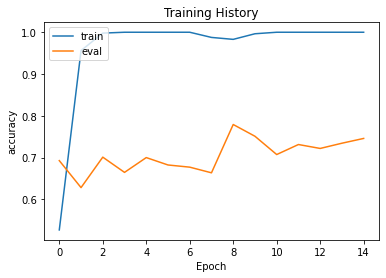

In [16]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'eval'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

In [17]:

train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

16/16 [==============================] - 2s 124ms/step - loss: 1.7361 - accuracy: 0.7500
final train accuracy = 100.00 , validation accuracy = 75.00


#### Test

(48, 48)


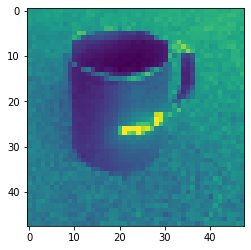

In [25]:
from keras.preprocessing import image


img = image.load_img("test/4.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)    

In [27]:
label_dict = {0:'Not ml6 mug',1:'Ml6 mug',2:'Not ml6 mug',3:'Not ml6 mug'}

In [28]:
img = np.expand_dims(img,axis = 0) 
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

[5.3728463e-08, 0.99999976, 1.3982779e-07, 4.0651127e-10]


In [29]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Ml6 mug


In [22]:
# Save Final Model
model.save('model_optimal.h5')

In [23]:
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)